In [1]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
from scipy.optimize import curve_fit 


# B field off

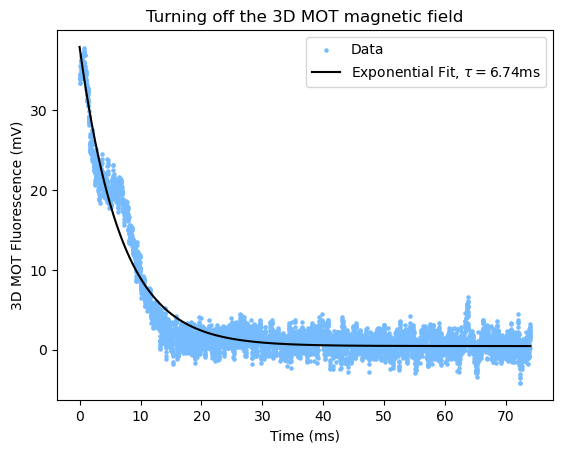

In [2]:
# df = pd.read_csv('C:/Users/Michael/University of Cambridge/PHY_US Group - Documents/MBQD-Shared/AION/Data/2023/08/22/Decay Rate Lifetime Experiments/Magnetic_off_decay_002/Magnetic_off_decay_002_3.csv',skiprows=[1])

df = pd.read_csv('/Volumes/MBQD_data/AION/Data/2023/08/22/Decay Rate Lifetime Experiments/Magnetic_off_decay_002/Magnetic_off_decay_002_3.csv',skiprows=[1])

df.iloc[:,1] = df.iloc[:,1]+30

df = df[df.iloc[:,0]  >= 720]

df = df[df.iloc[:,0]  <= 920]
window_size = 2
y_new = np.convolve(df.iloc[:,1], np.ones(window_size)/window_size, mode='valid')
x = df.iloc[:,0][(window_size-1)//2:-(window_size-1)//2]

threshold = 846

# Use boolean indexing to filter values
filtered_indices = x >= threshold
filtered_x = x[filtered_indices]-846
filtered_y = y_new[filtered_indices]

def exponential_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

p0=[6.24245103*10**7, 1.08006444*10**(-1), 5.12469870*10**4]

params, covariance = curve_fit(exponential_decay,filtered_x , filtered_y,p0, maxfev=8000)

a_opt, b_opt, c_opt = params

tau = 1/b_opt

y_fit = exponential_decay(filtered_x, a_opt, b_opt, c_opt)

plt.scatter(filtered_x[::200], filtered_y[::200],s=5,alpha=1,color = "xkcd:sky blue", label='Data')

plt.plot(filtered_x, y_fit, label=r'Exponential Fit, $\tau=%.2f$ms' %tau , color='black')

plt.xlabel('Time (ms)')
plt.ylabel("3D MOT Fluorescence (mV)")
plt.title('Turning off the 3D MOT magnetic field')
plt.legend()

# Show the plot
# plt.show()

# Push off

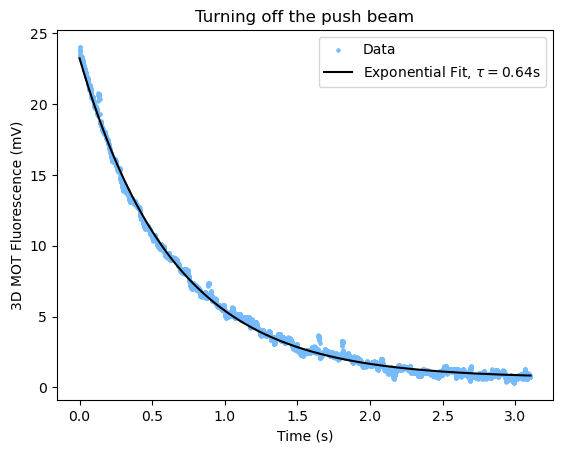

In [3]:
# df = pd.read_csv('C:/Users/Michael/University of Cambridge/PHY_US Group - Documents/MBQD-Shared/AION/Data/2023/08/22/Decay Rate Lifetime Experiments/push_decay_02.csv',skiprows=[1])

df2 = pd.read_csv('/Volumes/MBQD_data/AION/Data/2023/08/22/Decay Rate Lifetime Experiments/push_decay_02.csv',skiprows=[1])
df2.iloc[:,1] = df2.iloc[:,1]+30

df2 = df2[df2.iloc[:,0]  >= 1500]

df2 = df2[df2.iloc[:,0]  <= 6000]
def drop_rows_after_each_row(df, n):

    # List to store the indices of rows to keep
    keep_rows = []
    
    # Iterate over the rows
    for idx in range(0, len(df), n+1):
        keep_rows.append(idx)
    
    return df.iloc[keep_rows]
    
df2 = drop_rows_after_each_row(df2, 10)
window_size2 = 8000
y_new2 = np.convolve(df2.iloc[:,1], np.ones(window_size2)/window_size2, mode='valid')
x2 = df2.iloc[:,0][(window_size2-1)//2:-(window_size2-1)//2]

threshold2 = 2890

# Use boolean indexing to filter values
filtered_indices2 = x2 >= threshold2
filtered_x2 = x2[filtered_indices2]-2890
filtered_y2 = y_new2[filtered_indices2]

def exponential_decay(x, a, b, c):
    return a * np.exp(-b * x) + c


p02=[6.24245103*10**7, 1.08006444*10**(-1), 5.12469870*10**4]
params2, covariance2 = curve_fit(exponential_decay,filtered_x2, filtered_y2,p02, maxfev=10000)

a_opt2, b_opt2, c_opt2 = params2

tau2 = 1/b_opt2/1000

y_fit2 = exponential_decay(filtered_x2, a_opt2, b_opt2, c_opt2)

plt.scatter([i/1000 for i in filtered_x2][::500], filtered_y2[::500],s=5,color = "xkcd:sky blue", label='Data')

plt.plot([i/1000 for i in filtered_x2], y_fit2, label=r'Exponential Fit, $\tau = %.2f$s' %tau2, color='black')

plt.xticks(np.arange(0, 3.5, 0.5))

plt.xlabel('Time (s)')
plt.ylabel("3D MOT Fluorescence (mV)")
plt.title('Turning off the push beam')
plt.legend()

# Show the plot
# plt.show()

# Now plot both of them

In [9]:
# copy paste this code to the beginning of your script to set the plotting style for a two column figure

from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    # "figure.constrained_layout.use": True
})

plt.rcParams["figure.autolayout"] = False # set to True if you want to use constrained_layout

plt.rcParams["savefig.bbox"] = None
plt.rcParams["figure.figsize"] = (5.9,3)
plt.rcParams["figure.titlesize"] = 10 # this is only for plt.suptitle, i set it to be the same as the rest

plt.rcParams["axes.titlesize"] = 10 # control title size
plt.rcParams["axes.labelsize"] = 10 # control x and y axis labels
plt.rcParams["axes.labelpad"] = 4.0 # distance between axis label and axis numbers
plt.rcParams["xtick.labelsize"] = 10 # independent control of xlabel fontsize
plt.rcParams["ytick.labelsize"] = 10 # independent control of ylabel fontsize

plt.rcParams["legend.fontsize"] = 7.5 # control legend size, I set it to be slightly smaller than title/axes label
# plt.rcParams["legend.facecolor"] = (0.9, 0.9, 0.9) # legend background color
# plt.rcParams["legend.edgecolor"] = (0, 0, 0) # legend border line color
# plt.rcParams["legend.frameon"] = True # whether or not to draw a border around legend
# plt.rcParams["legend.framealpha"] = 0.1 # legend background transparency
plt.rcParams["legend.loc"] = "upper left" # default legend location
plt.rcParams["legend.handletextpad"] = 0.8  # Horizontal space between legend point and text (default 0.8)
plt.rcParams["legend.labelspacing"] = 0.6  # Vertical space between legend entries (default 0.5)
# plt.rcParams["legend.columnspacing"] = 2.0  # Space between columns in multi-column legends
# plt.rcParams["legend.borderpad"] = 1.0  # Space between legend content and the box
# plt.rcParams["legend.handlelength"] = 2.0  # Length of legend marker lines

plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = 2 #data point size

# CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"
# plt.rcParams["lines.linewidth"] = 1
# plt.rcParams["lines.markersize"] = 6 #data point size
# plt.rcParams["lines.markeredgewidth"] = 1.5 # width of the edge of the marker
# plt.rcParams["lines.markeredgecolor"] = "black" # color of the edge of the marker
# plt.rcParams["lines.markerfacecolor"] = "dodgerblue" # color of the inside of the marker
# plt.rcParams["lines.marker"] = "o" # marker type, see https://matplotlib.org/stable/api/markers_api.html for all options
# plt.rcParams["lines.color"] = "black" # color of the line
# # CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"

plt.rcParams["grid.linestyle"] = "--"
plt.rcParams['axes.grid'] = True
# plt.rcParams["grid.linewidth"] = 0.7

# plt.rcParams["xtick.major.pad"] = 4.0 # distance between xticks dashes and xaxis numbers
# plt.rcParams["xtick.major.size"] = 3.0
# plt.rcParams["xtick.major.width"] = 0.7
# plt.rcParams["ytick.major.pad"] = 4.0 # distance between yticks dashes and yaxis numbers
# plt.rcParams["ytick.major.size"] = 3.0
# plt.rcParams["ytick.major.width"] = 0.7





# plot two figures side by side
# fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, constrained_layout=True)
# plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2) # remove unnecessary white space how i like it, this is manual very of use constrained_layout

# That warning is because matplotlib’s default layout engine has changed in recent
# versions to use constrained_layout, which is incompatible with subplots_adjust and tight_layout. 
# If you try to use plt.subplots_adjust when constrained_layout=True, matplotlib will raise that warning and ignore the call.
# If you're manually adjusting spacing, disable constrained_layout when you create the figure:

In [10]:
def number_of_atoms(photodiode_voltage_in_mV):
    P_v = photodiode_voltage_in_mV * 1e-3 # V #Photodiode signal
    P_r = 680*10**(3) # ohm
    Respons = 0.15
    c = 299792458 #m/s
    h = 6.62607015*10**(-34)# Joule*second
    wavelength = 460.862022*10**(-9)
    f = c/wavelength# m/s
    gamma = 2*np.pi*30.41*10**(6) #The natural linewidth of the transition
    I_Isat = 0.9
    detune = -60e6 #Hz detuning of the 3D MOT beam


    P_I = P_v/P_r
    P_P = P_I/Respons
    E = h*f 
    r_p=P_P/E
    R = gamma/2*I_Isat/(1+I_Isat+4*detune**2/gamma**2)
    N_pd = r_p/R 

    r_sqre = (12.7*10**(-3)/2)**2
    d = 0.15

    A = np.pi*r_sqre
    Omega = A/d**2


    N_r = N_pd*4*np.pi/Omega

    return N_r/1e7

In [11]:
tau_error = np.sqrt(np.diag(covariance)[1])/(b_opt**2)
print(f"tau = {tau} ms, tau error = {tau_error} ms")
tau2_error = np.sqrt(np.diag(covariance2)[1])/(b_opt2**2)
print(f"tau2 = {tau2} s, tau2 error = {tau2_error} s")

tau = 6.739507598923721 ms, tau error = 0.003229122134239934 ms
tau2 = 0.642489522137217 s, tau2 error = 0.050284282492812075 s


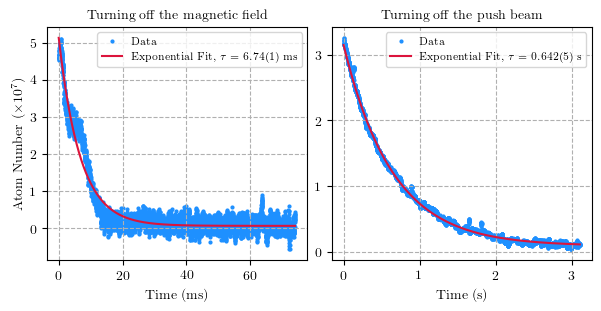

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True)

ax1.scatter(filtered_x[::200], number_of_atoms(filtered_y[::200]),alpha=1,color = "dodgerblue", label='Data')
ax1.plot(filtered_x, number_of_atoms(y_fit), label=r'Exponential Fit, $\tau=%.2f$(%d) ms' %(tau,(np.ceil(tau_error*100))) , linewidth=1.5, color='crimson')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel(r"Atom Number ($\times$10$^7$)")
ax1.set_title('Turning off the magnetic field')
ax1.legend(loc='upper right')

ax2.scatter([i/1000 for i in filtered_x2][::500], number_of_atoms(filtered_y2[::500]),color = "dodgerblue", label='Data')
ax2.plot([i/1000 for i in filtered_x2], number_of_atoms(y_fit2), label=r'Exponential Fit, $\tau = %.3f$(%d) s' %(tau2,tau2_error*100), linewidth=1.5, color='crimson')
# ax2.set_xticks(np.arange(0, 3.5, 0.5))
ax2.set_xlabel('Time (s)')
ax2.set_yticks(np.arange(0, 3.5, 1))
# ax2.set_ylabel("3D MOT Fluorescence (mV)")
ax2.set_title('Turning off the push beam')
ax2.legend(loc='upper right')

plt.savefig('250510 3DBlueMOTLifetimeDecayTwoColumnFigure.pdf', dpi=300)